In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from gensim.models.word2vec import Word2Vec

In [3]:
from collections import OrderedDict

models = OrderedDict([
    (year, Word2Vec.load('models/bpo/{}.bin'.format(year)))
    for year in range(1720, 1960, 20)
])

In [4]:
def cosine_series(anchor, query):
    
    series = OrderedDict()
    
    for year, model in models.items():
        
        series[year] = (
            model.similarity(anchor, query)
            if query in model else 0
        )

    return series

In [5]:
import numpy as np
import statsmodels.api as sm

def lin_reg(series):

    x = np.array(list(series.keys()))
    y = np.array(list(series.values()))

    x = sm.add_constant(x)

    return sm.OLS(y, x).fit()

In [6]:
def plot_cosine_series(anchor, query, w=5, h=4):
    
    series = cosine_series(anchor, query)
    
    fit = lin_reg(series)

    x1 = list(series.keys())[0]
    x2 = list(series.keys())[-1]

    y1 = fit.predict()[0]
    y2 = fit.predict()[-1]
    
    print(anchor, query)
    
    plt.figure(figsize=(w, h))
    plt.ylim(0, 1)
    plt.title(query)
    plt.xlabel('Year')
    plt.ylabel('Similarity')
    plt.plot(list(series.keys()), list(series.values()))
    plt.plot([x1, x2], [y1, y2], color='gray', linewidth=0.5)
    plt.show()

science poetry


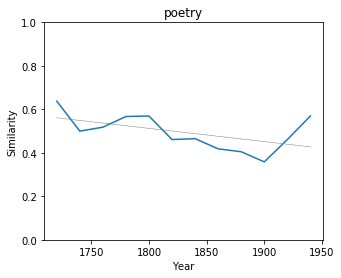

literature poetry


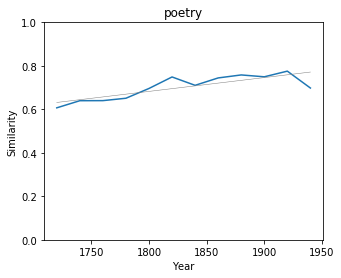

literature writing


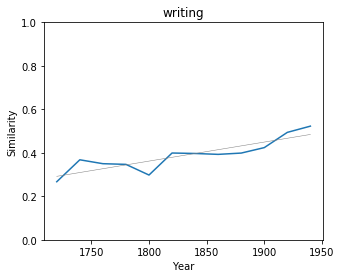

literature polite


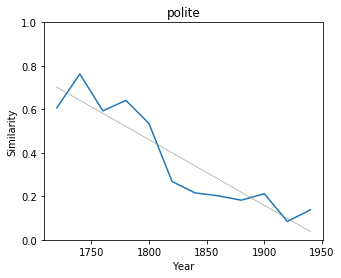

In [7]:
plot_cosine_series('science', 'poetry')
plot_cosine_series('literature', 'poetry')
plot_cosine_series('literature', 'writing')
plot_cosine_series('literature', 'polite')

In [8]:
import enchant

dictionary = enchant.Dict('en_US')

def union_neighbor_vocab(anchor, topn=200):
    
    vocab = set()
    
    for year, model in models.items():
        similar = model.most_similar(anchor, topn=topn)
        vocab.update([s[0] for s in similar if dictionary.check(s[0])])
        
    return vocab

In [9]:
union_vocab = union_neighbor_vocab('literature')

In [10]:
data = []
for token in union_vocab:
    
    series = cosine_series('literature', token)
    fit = lin_reg(series)
    
    data.append((token, fit.params[1], fit.pvalues[1]))

In [11]:
import pandas as pd

df1 = pd.DataFrame(data, columns=('token', 'slope', 'p'))

# Increasing

In [12]:
pd.set_option('display.max_rows', 1000)

df1.sort_values('slope', ascending=False).head(50)

,token,slope,p
447,journalism,0.004263,0.000052
158,psychology,0.003640,0.000081
378,renaissance,0.003440,0.001242
510,anthropology,0.003316,0.000328
69,sociology,0.003243,0.000100
1,biology,0.003210,0.000165
475,folklore,0.003119,0.000631
398,technique,0.002996,0.001171
572,decadence,0.002940,0.000517
546,masterpieces,0.002929,0.000369


literature journalism


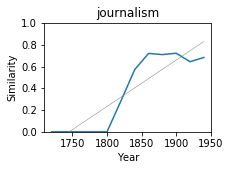

literature psychology


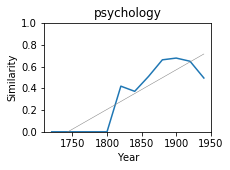

literature renaissance


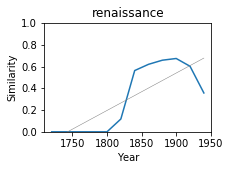

literature anthropology


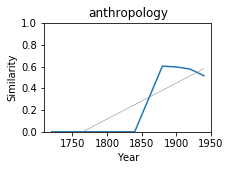

literature sociology


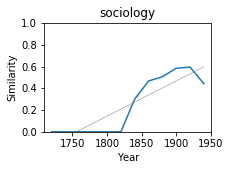

literature biology


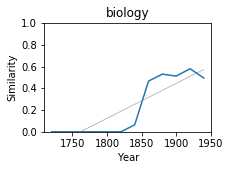

literature folklore


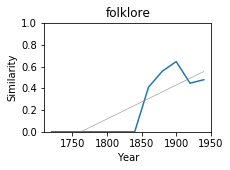

literature technique


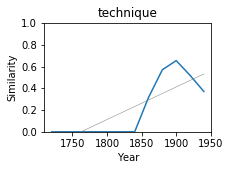

literature decadence


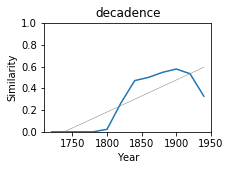

literature masterpieces


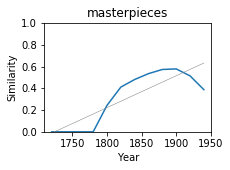

literature scholarship


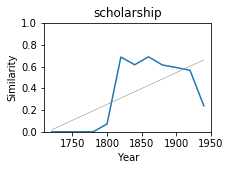

literature curriculum


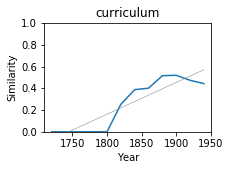

literature symbolism


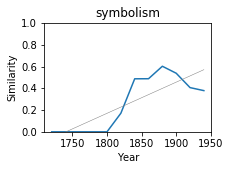

literature linguistic


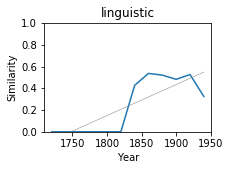

literature realism


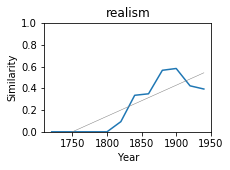

literature biographies


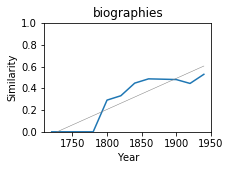

literature pictorial


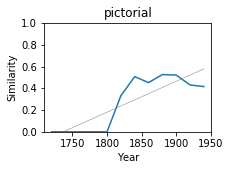

literature mysticism


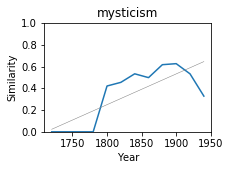

literature handbook


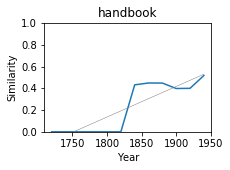

literature periodicals


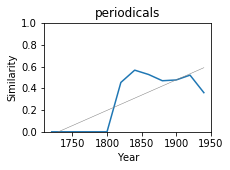

In [13]:
for i, row in df1.sort_values('slope', ascending=False).head(20).iterrows():
    plot_cosine_series('literature', row['token'], 3, 2)

# Decreasing

In [14]:
df1.sort_values('slope', ascending=True).head(50)

,token,slope,p
421,polite,-0.003020,0.000025
424,politer,-0.002901,0.000111
377,proficients,-0.002741,0.000138
364,mechanic,-0.002513,0.000014
420,encourager,-0.002496,0.000003
632,pharmacy,-0.002490,0.000025
272,stare,-0.002378,0.006064
300,literati,-0.002293,0.000955
322,agronomy,-0.002120,0.001476
459,ornamental,-0.001997,0.000027


literature polite


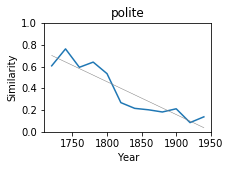

literature politer


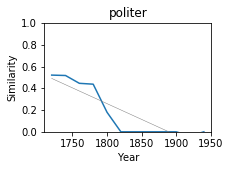

literature proficients


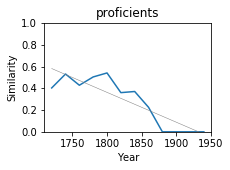

literature mechanic


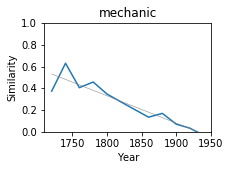

literature encourager


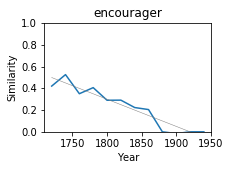

literature pharmacy


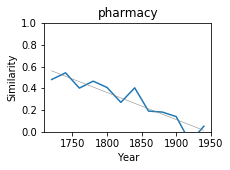

literature stare


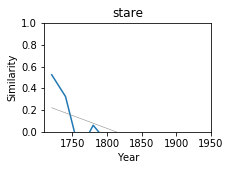

literature literati


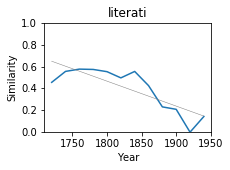

literature agronomy


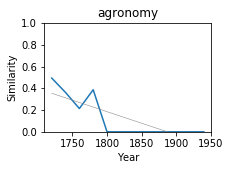

literature ornamental


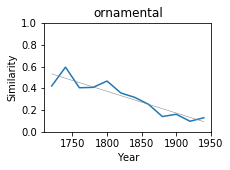

literature liberal


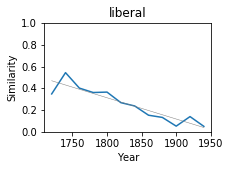

literature mercantile


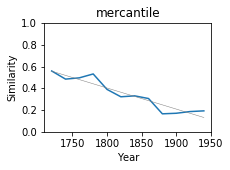

literature dunces


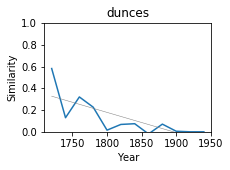

literature proficient


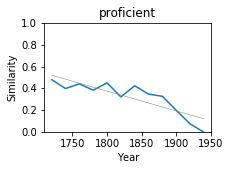

literature mechanics


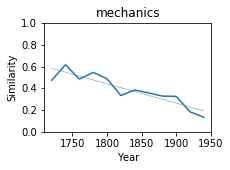

literature frugality


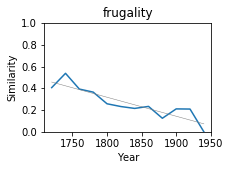

literature excelling


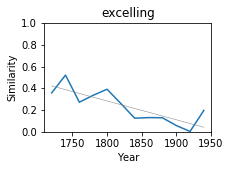

literature academical


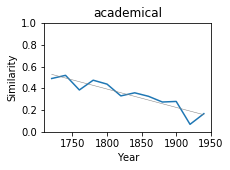

literature skilled


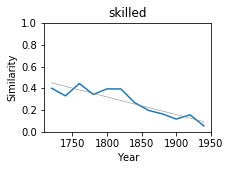

literature improvement


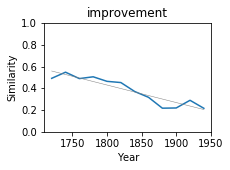

In [15]:
for i, row in df1.sort_values('slope', ascending=True).head(20).iterrows():
    plot_cosine_series('literature', row['token'], 3, 2)

In [16]:
def intersect_neighbor_vocab(anchor, topn=1000):
    
    vocabs = []
    
    for year, model in models.items():
        similar = model.most_similar(anchor, topn=topn)
        vocabs.append(set([s[0] for s in similar if dictionary.check(s[0])]))
        
    return set.intersection(*vocabs)

In [17]:
intersect_vocab = intersect_neighbor_vocab('literature')

In [20]:
data = []
for token in intersect_vocab:
    
    series = cosine_series('literature', token)
    fit = lin_reg(series)
    
    if fit.pvalues[1] < 0.05:
        data.append((token, fit.params[1], fit.pvalues[1]))

In [21]:
import pandas as pd

df2 = pd.DataFrame(data, columns=('token', 'slope', 'p'))

# Intersected neighbors

In [22]:
df2.sort_values('slope', ascending=False)

,token,slope,p
2,art,0.001591,0.001347
5,culture,0.001178,0.005864
0,language,0.000973,0.000014
3,poetry,0.000636,0.001080
9,geography,-0.000304,0.036853
1,sciences,-0.000540,0.033214
8,languages,-0.000601,0.022820
4,proficiency,-0.000603,0.010853
6,mathematics,-0.000604,0.028463
7,rhetoric,-0.000639,0.036787


literature art


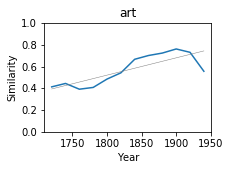

literature culture


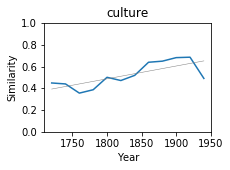

literature language


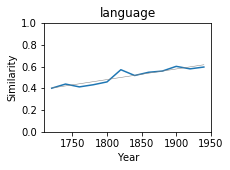

literature poetry


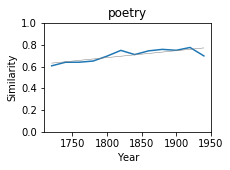

literature geography


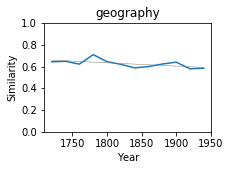

literature sciences


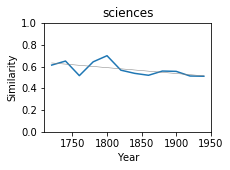

literature languages


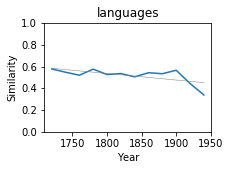

literature proficiency


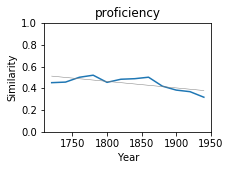

literature mathematics


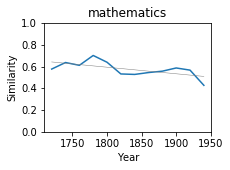

literature rhetoric


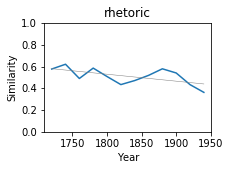

In [23]:
for i, row in df2.sort_values('slope', ascending=False).iterrows():
    plot_cosine_series('literature', row['token'], 3, 2)